In [14]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!pip install tensorflow opencv-python matplotlib

In [4]:
import numpy as np
import pandas as pd
from pathlib import Path 
import os.path 
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report



In [5]:
#Building the data pipeline
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/Colab Notebooks/FoodCheck/Indian Food Images')

Found 4000 files belonging to 80 classes.


In [6]:
data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [7]:
tf.keras.utils.image_dataset_from_directory??

In [8]:
#Accessing the data pipeline, allowing us through loop through it
data_iterator = data.as_numpy_iterator()

In [9]:
data_iterator

In [10]:
#This is accessing the data pipeline itself
batch = data_iterator.next()

In [11]:
len(batch) #Means there are two parts to the dataset, there is images and labels

2

In [12]:
#Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [13]:
#labels
batch[1]

array([43, 13, 16,  0,  3, 62, 38, 49, 55, 57,  0, 57, 63, 56, 37, 55, 75,
       69, 51, 31,  2, 58, 33, 77, 36,  7, 16, 20, 55, 16, 10, 73],
      dtype=int32)

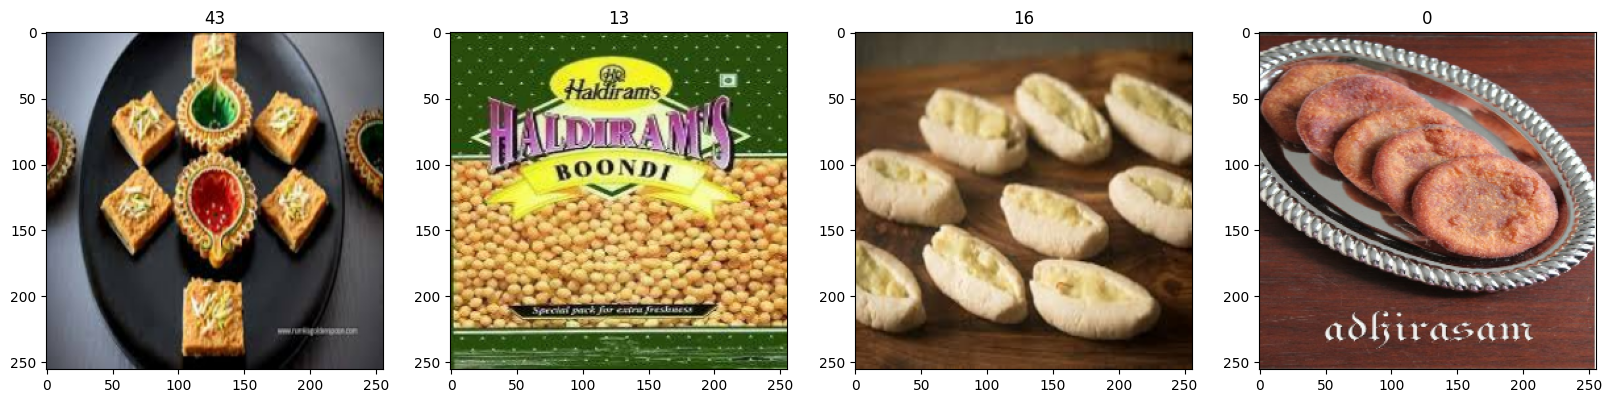

In [15]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [16]:
#Get another batch from the iterator
batch = data_iterator.next()

In [17]:
batch[0].shape

(32, 256, 256, 3)

In [18]:
batch[1]

array([ 6,  4, 67, 27, 21, 21, 69, 35, 50, 73,  6, 47, 13, 41, 36, 15, 29,
       71, 52, 41, 32, 34, 17, 50, 47, 15, 40,  4, 39, 65, 47, 61],
      dtype=int32)

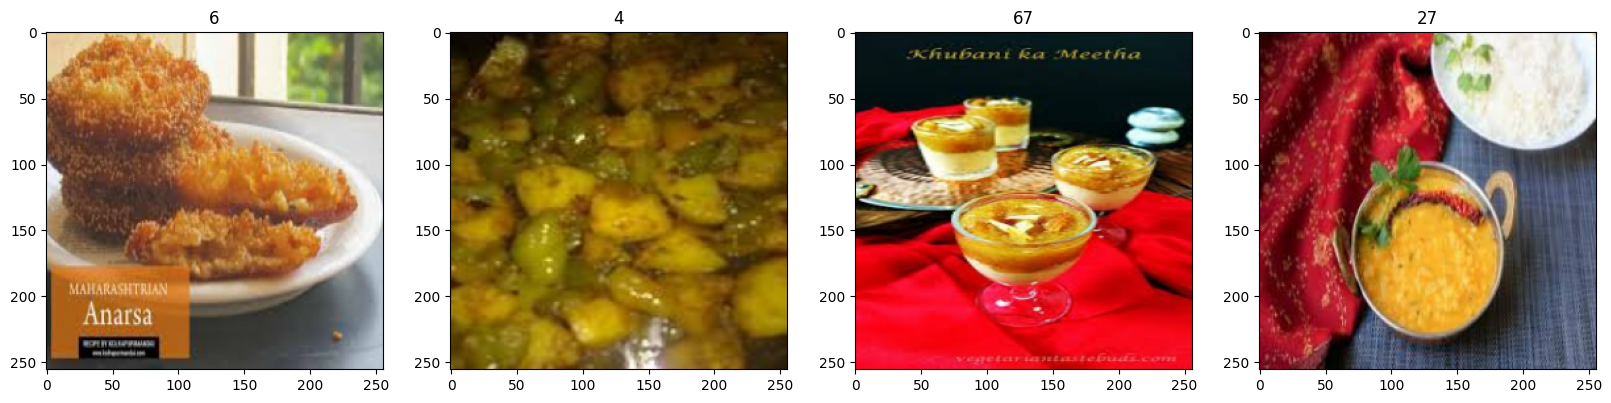

In [19]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [20]:
batch

(array([[[[231.       , 202.       , 158.       ],
          [231.06445  , 202.06445  , 158.06445  ],
          [232.10742  , 203.10742  , 159.10742  ],
          ...,
          [133.57031  , 153.57031  ,  92.57031  ],
          [134.       , 154.       ,  93.       ],
          [134.       , 154.       ,  91.04297  ]],
 
         [[231.       , 202.       , 158.       ],
          [231.06445  , 202.06445  , 158.06445  ],
          [232.04218  , 203.04218  , 159.04218  ],
          ...,
          [132.00905  , 152.00905  ,  91.00905  ],
          [132.17773  , 152.17773  ,  90.04119  ],
          [132.17773  , 152.17773  ,  89.1946   ]],
 
         [[231.       , 202.       , 158.       ],
          [231.06445  , 202.06445  , 158.06445  ],
          [232.       , 203.       , 159.       ],
          ...,
          [130.72858  , 150.72858  ,  89.111435 ],
          [130.6543   , 150.6543   ,  87.73864  ],
          [130.6543   , 150.6543   ,  87.6543   ]],
 
         ...,
 
         [[ 

## Pre-Processing the data

Scale data

In [ ]:
data = data.map(lambda x,y: (x/255,y))

In [ ]:
scaled_iterator = data.as_numpy_iterator()

In [ ]:
scaled_iterator.next()[0].max()

1.0

In [ ]:
batch = scaled_iterator.next()

In [ ]:
batch[0].min()

0.0

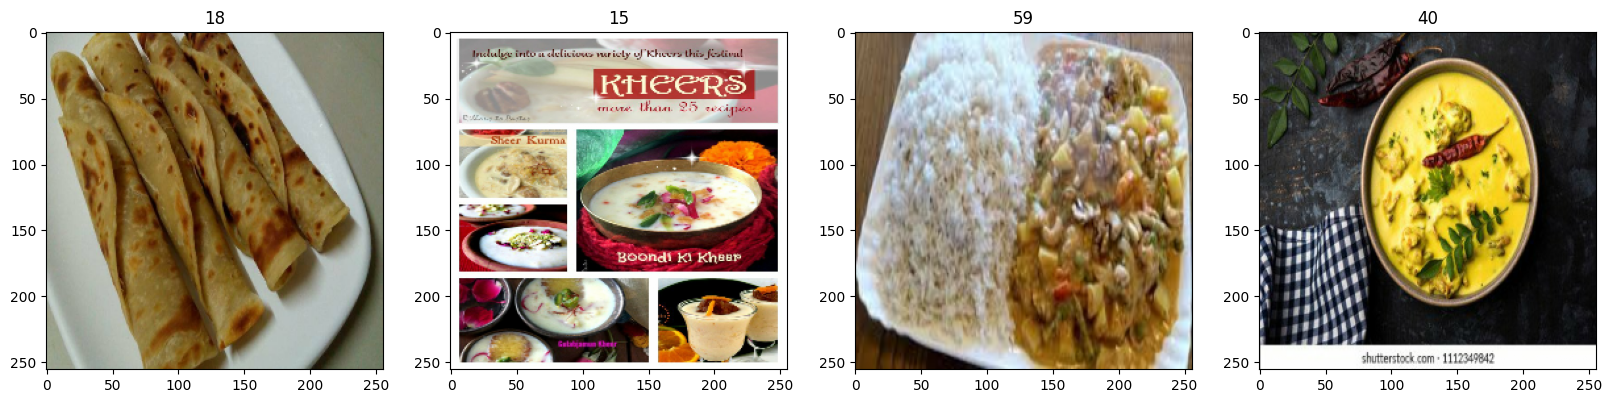

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize =(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img)
  ax[idx].title.set_text(batch[1][idx])

Split Data

In [ ]:
len(data)

125

In [ ]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [ ]:
train_size+val_size+test_size

126

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
len(val)

26

## Deep Model

Build Deep Learning Model

In [ ]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

Train

In [ ]:
logdir='logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=100, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/100
87/87 [==============================] - 1096s 13s/step - loss: -7077713.5000 - accuracy: 0.0119 - val_loss: -53080752.0000 - val_accuracy: 0.0144
Epoch 2/100
87/87 [==============================] - 223s 3s/step - loss: -1156936960.0000 - accuracy: 0.0122 - val_loss: -4321512448.0000 - val_accuracy: 0.0132
Epoch 3/100
87/87 [==============================] - 211s 2s/step - loss: -20898148352.0000 - accuracy: 0.0115 - val_loss: -51146924032.0000 - val_accuracy: 0.0180
Epoch 4/100
87/87 [==============================] - 215s 2s/step - loss: -143681142784.0000 - accuracy: 0.0111 - val_loss: -286182113280.0000 - val_accuracy: 0.0156
Epoch 5/100
87/87 [==============================] - 212s 2s/step - loss: -596277002240.0000 - accuracy: 0.0111 - val_loss: -992481116160.0000 - val_accuracy: 0.0156
Epoch 6/100
87/87 [==============================] - 219s 2s/step - loss: -1780356874240.0000 - accuracy: 0.0122 - val_loss: -2691262840832.0000 - val_accuracy: 0.0168
Epoch 7/100
87/

KeyboardInterrupt: ignored

Plot Performance

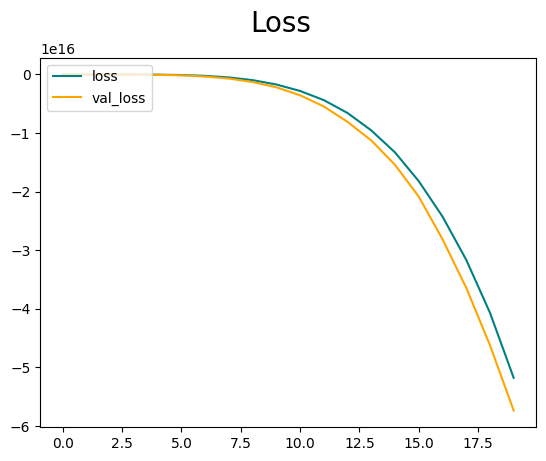

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

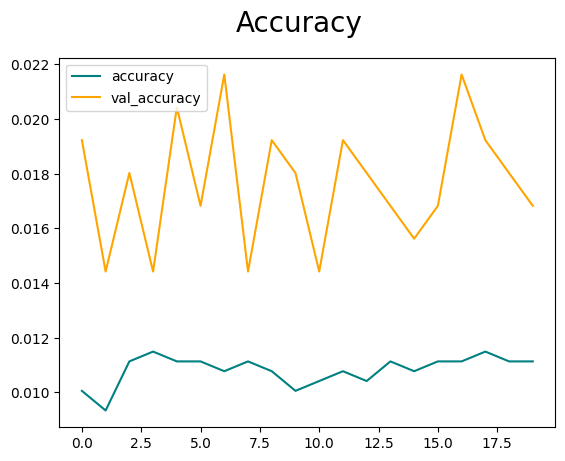

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

Evaluate

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 563ms/step


In [ ]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.9895833, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.010416667, shape=(), dtype=float32)


Test

In [ ]:
import cv2